# Lesson 10. Random number generation, testing for independence

### SA421 Fall 2015

## Some useful Python-isms

* Modular arithmetic in Python: `x % y` is $x \mod y$


* Quickly, give it a shot: compute $53 \mod 7$.

In [1]:
53 % 7

4

* We can access the last item of a list with the `-1` index: for example, `X[-1]` is the last item of list `X`.


* We can also **slice** a list: `X[a:b]` contains all items of X between the $a$th item and the $b-1$th item.


* Try it out:

In [2]:
# Here's a list
X = [23, 45, 67, 89, 101, 112, 131, 415]

# Get the last item of X
print("The last item of X is {0}.".format(X[-1]))

# Make a slice of X containing X[2], X[3], X[4], and X[5]:
print("The slice containing X[2], X[3], X[4], and X[5] is {0}.".format(X[2:6]))

The last item of X is 415.
The slice containing X[2], X[3], X[4], and X[5] is [67, 89, 101, 112].


## The linear congruential method

**Example.** Generate 50 pseudo-random numbers using the linear congruential method with a
modulus of $2^{31}$, a multiplier of 1103515245, an increment of 12345, and a seed of 123457.

*Historical note.* This generator is used in the GNU Compiler Collection (GCC). For generators used in other compilers, [click here](https://en.wikipedia.org/wiki/Linear_congruential_generator).

In [3]:
# Multiplier
a = 1103515245

# Increment
c = 12345

# Modulus
m = 2**31

# Initialize sequence of integers with seed
X = [123457]

# Compute sequence of integers
for i in range(50):
    X.append((a * X[-1] + c) % m)

# Print sequence of integers
print("X = {0}".format(X))

# Compute pseudo-random numbers based on sequence of integers in X
R = [val / m for val in X]

# Print pseudo-random numbers
print("R = {0}".format(R))

X = [123457, 318985190, 1709112615, 71162836, 21586301, 195086450, 1790198979, 226943296, 1385142393, 237959614, 1091332639, 1838731628, 526926645, 333247434, 530024763, 1039636568, 2129059249, 1203667606, 770407959, 712630788, 198878189, 542650914, 220193971, 599071344, 1154126313, 99307118, 1311381775, 1277783452, 1873896357, 293725050, 1912157995, 204326792, 2105120033, 817544518, 1330780935, 2023478324, 691626589, 978675666, 2053857443, 2017197984, 1328465753, 1065234206, 172581887, 1408333260, 930840597, 635051818, 1473921307, 497427128, 1352730769, 1448281078, 315741175]
R = [5.7489145547151566e-05, 0.1485390542075038, 0.7958675804547966, 0.03313777782022953, 0.01005190471187234, 0.09084420744329691, 0.8336263610981405, 0.10567870736122131, 0.6450071898289025, 0.11080858018249273, 0.5081913615576923, 0.8562261369079351, 0.24536933982744813, 0.15518042910844088, 0.2468120134435594, 0.48411850258708, 0.9914204706437886, 0.5605014069005847, 0.358749161940068, 0.3318445701152086, 0.0

## Testing for independence

* First, some setup code:

In [4]:
##### Setup #####
# Import plot, bar from Matplotlib
from matplotlib.pyplot import plot, bar

# Run Matplotlib magic to show plots directly in the notebook
%matplotlib inline

# Make Matplotlib plots display as SVG files, which are cleaner
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Import pearsonr from scipy.stats
from scipy.stats import pearsonr

* Consider the sequence of random numbers we generated above. Are they independent?


* Let's start by plotting these random numbers:
    * `marker` is a formatting keyword for the `plot` function.
    * Others examples of formatting keywords: `linestyle`, `color`. 
    * See the documentation for plot [here](http://matplotlib.org/1.3.1/api/pyplot_api.html?highlight=pyplot.plot#matplotlib.pyplot.plot).

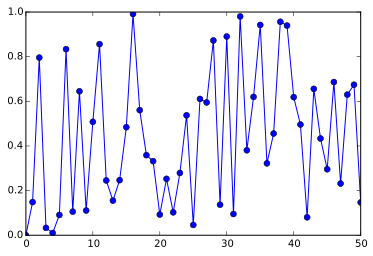

In [5]:
# Plot random numbers
plot(R, marker='o')

* Based on this plot, do you think the random numbers are independent?

Visually, they look independent: there is no discernible pattern in the sequence of random numberes.

* Let's compute the lag-$k$ autocorrelations for $k = 0,1,\dots,20$.


* Recall that the lag-$k$ autocorrelation is the observed sample correlation coefficient between $(y_0,\dots, y_{n - k - 1})$ and $(y_{k},\dots,y_{n-1})$.


* We can compute the observed sample correlation coefficient between two samples using `pearsonr` from `scipy.stats`.


* To compute autocorrelation, we need to apply `pearsonr` to the correct portions of `R`.


* `pearsonr(x, y)` computes the observed sample correlation coefficient between lists of values `x` and `y`.
    * Outputs a list of 2 values: (correlation coefficient, p-value).
    * For our purposes, we want the correlation coefficients.

In [6]:
# Number of observations/random numbers
n = len(R)

# Lag-k autocorrelation for k = 0,1,...,20
lagAC = []
for k in range(21):
    [corr, pvalue] = pearsonr(R[0:n-k], R[k:n])
    lagAC.append(corr)
    
# Print for inspection
# The 0-th item is the lag-0 autocorrelation, 
# the 1st item is the lag-1 autocorrelation, and so on.
print("lag-k autocorrelations = {0}".format(lagAC))

lag-k autocorrelations = [1.0, -0.0882960782119529, 0.10703383581418702, -0.017906143130057759, 0.10918044816200353, 0.16143743132908037, 0.044253495204333151, -0.16346209270223136, 0.11392212341027069, 0.092321818551300561, -0.065403730620913411, 0.15214347494646827, -0.16336463076596133, -0.014474626572675333, 0.0056138844739283067, -0.20580028048761928, 0.097260536306193843, 0.0017328810140389728, -0.021279162592291602, 0.088423567788049204, 0.04222713409000238]


* Let's use `plot` to get a visual of what's going on:

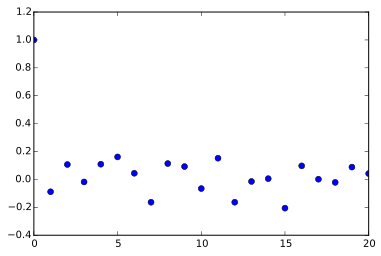

In [7]:
# Plot autocorrelations
plot(lagAC, linestyle='None', marker='o')

* **Rule of thumb:** if the autocorrelations are "small" (absolute value less than 0.3), then <span style="color:#a00000;">do not reject</span> the hypothesis that the random variates are independent.


* **Caution!** When testing a sequence of values for independence, <span style="color:#a00000;">make sure your values are in the original sequence.</span>
    * In particular, make sure that you haven't sorted the sequence. (Why?)

## If we have time &mdash; with a neighbor...

Perform the Kolmogorov-Smirnov goodness-of-fit test to determine whether the random numbers generated in the previous example are from a uniform distribution on [0,1]. Print the observed test statistic and p-value. What can you conclude?

In [8]:
# Import sqrt from numpy
from numpy import sqrt

# Import uniform, kstwobign from scipy.stats
from scipy.stats import uniform, kstwobign

# Parameters of proposed distribution
uniformLoc = 0
uniformScale = 1

# Get the number of observations
n = len(R)

# Sort the observations
R.sort()

# Compute K-S observed test statistic
d = max([max(uniform.cdf(R[i], loc = uniformLoc, scale = uniformScale) - i/n, (i+1)/n - uniform.cdf(R[i], loc = uniformLoc, scale = uniformScale)) for i in range(n)])

# Print K-S observed test statistic
print("K-S observed test statistic = {0}".format(d))

# Compute p-value
pValue = 1 - kstwobign.cdf(sqrt(n) * d)

# Print p-value
print("K-S p-value = {0}".format(pValue))

K-S observed test statistic = 0.13893721795038266
K-S p-value = 0.278443759361684


Assuming a significance level of 0.05, based on the K-S test, we can statistically conclude that the random numbers generated in the previous example are from a uniform distribution on [0,1].

Compute and plot the lag-$k$ autocorrelation ($k = 0, 1,\dots, 20$) for the random numbers generated in the first example, **sorted from lowest to highest** as you just did to perform the Kolmogorov-Smirnov test. Does your plot make sense? Why are these new autocorrelation values not useful for testing for independence?

lag-k autocorrelations = [1.0, 0.99800617784226786, 0.99566733429551268, 0.99341390281432196, 0.99170263692280725, 0.99006521427319683, 0.98770794252613592, 0.98642562465390227, 0.98613793881889145, 0.9867790028292962, 0.98775437788016407, 0.98764211878967467, 0.98665722763378705, 0.9859199366915733, 0.98623705848280285, 0.98714808904410645, 0.98714459162831014, 0.9853238263404871, 0.9831350660636734, 0.98179129826204492, 0.98085683755786568]


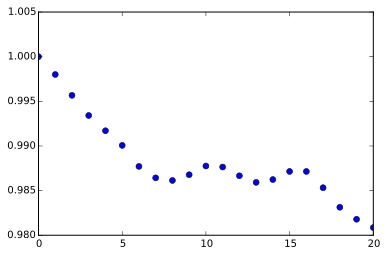

In [9]:
# Number of observations/random numbers
n = len(R)

# Lag-k autocorrelation for k = 0,1,...,20
lagAC = []
for k in range(21):
    [corr, pvalue] = pearsonr(R[0:n-k], R[k:n])
    lagAC.append(corr)
    
# Print for inspection
# The 0-th item is the lag-0 autocorrelation, 
# the 1st item is the lag-1 autocorrelation, and so on.
print("lag-k autocorrelations = {0}".format(lagAC))

# Plot autocorrelations
plot(lagAC, linestyle='None', marker='o')

By sorting the data, we introduce a positive correlation between the lagged vectors $(y_0, \dots, y_{n-k-1})$ and $(y_k, \dots, y_{n-1})$ because now they are both (artificially) sorted in nondecreasing order.